# Perceptron

## Fungsi-fungsi *Plotting*

Jangan mengubah kode pada *cell* di bawah ini.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(f1, f2, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()
    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, f1(line_x))
    plt.plot(line_x, f2(line_x))
    plt.show()

## Praktikum

### a) Fungsi *Step* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [ ]:
def percep_step(input, th=0):
  return 1 if input > th else -1 if input < -th else 0

### b) Fungsi *training* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [ ]:
def percep_fit(X, target, th=0, a=1, max_epoch=-1, verbose=False, draw=False):
  w = np.zeros(len(X[0]) + 1)
  bias = np.ones((len(X), 1))
  X = np.hstack((bias, X))
  stop = False
  epoch = 0

  while not stop and (max_epoch == -1 or epoch < max_epoch):
    stop = True
    epoch += 1

    if verbose:
      print('\nEpoch', epoch)

    for r, row in enumerate(X):
      y_in = np.dot(row, w)
      y = percep_step(y_in, th)
      if y != target[r]:
        stop = False

        w = [w[i] + a * target[r] * row[i] for i in range(len(row))]
    if verbose:
      print('Bobot:', w)
    if draw:
      plot(line(w, th), line(w, -th), X, target)

  return w, epoch

### c) Fungsi *testing* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [ ]:
def percep_predict(X, w, th=0):
  Y = []

  for x in X:
    y_in = w[0] + np.dot(x, w[1:])
    y = percep_step(y_in, th)

    Y.append(y)

  return Y

### d) Fungsi Hitung Akurasi

Tulis kode ke dalam *cell* di bawah ini:

In [ ]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]

  return sum(s) / len(a)

### e) Logika AND

Tulis kode ke dalam *cell* di bawah ini:


Epoch 1
Bobot: [-1.0, 1.0, 1.0]


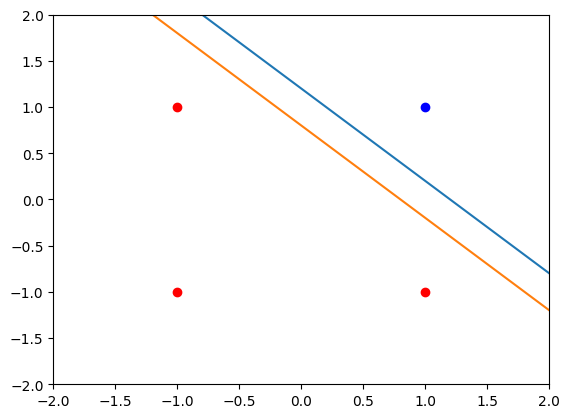


Epoch 2
Bobot: [-1.0, 1.0, 1.0]


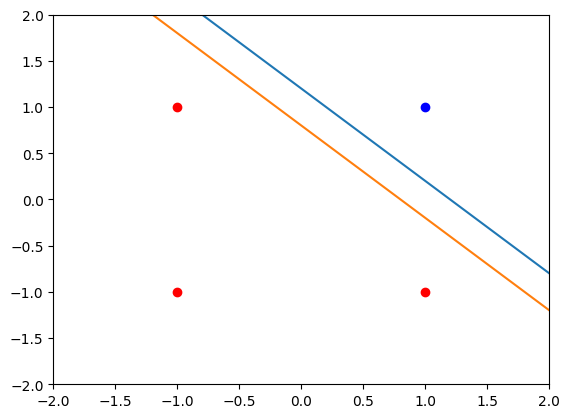

Epochs: 2
Output: [1, -1, -1, -1]
Target: (1, -1, -1, -1)
Accuracy: 1.0


In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, -1, -1, -1
th = .2
model, epoch = percep_fit(train, target, th, verbose=True, draw=True)
output = percep_predict(train, model)
accuracy = calc_accuracy(output, target)

print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

### f) Logika OR

Tulis kode ke dalam *cell* di bawah ini:


Epoch 1
Bobot: [1.0, 1.0, 1.0]


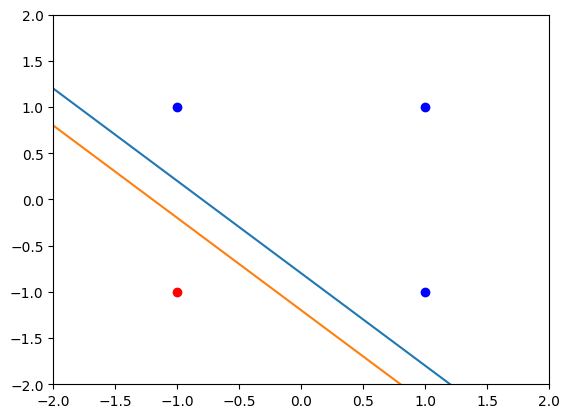


Epoch 2
Bobot: [1.0, 1.0, 1.0]


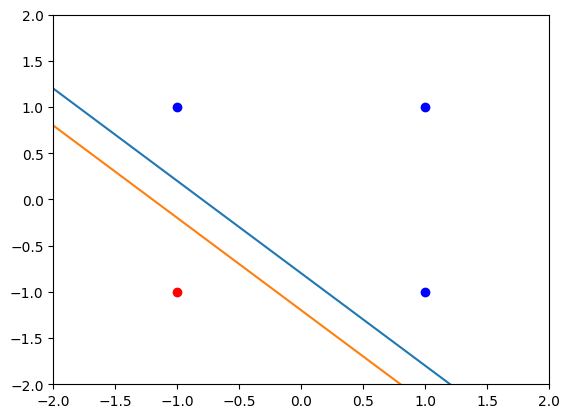

Epochs: 2
Output: [1, 1, 1, -1]
Target: (1, 1, 1, -1)
Accuracy: 1.0


In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, 1, 1, -1
th = .2
model, epoch = percep_fit(train, target, th, verbose=True,
draw=True)
output = percep_predict(train, model)
accuracy = calc_accuracy(output, target)

print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

### g) Logika AND NOT

Tulis kode ke dalam *cell* di bawah ini:


Epoch 1
Bobot: [-1.0, 1.0, -1.0]


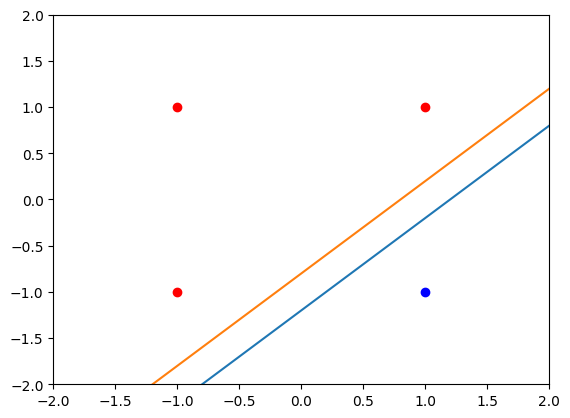


Epoch 2
Bobot: [-1.0, 1.0, -1.0]


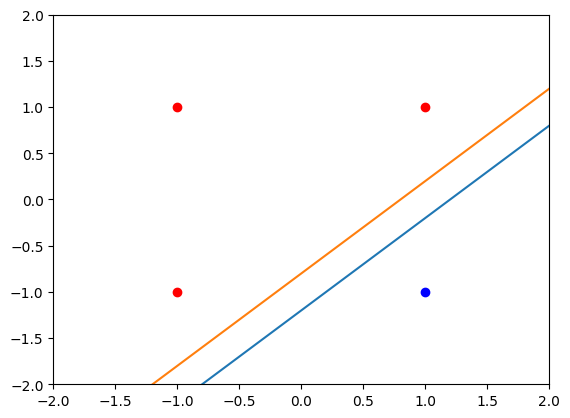

Epochs: 2
Output: [-1, 1, -1, -1]
Target: (-1, 1, -1, -1)
Accuracy: 1.0


In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, -1, -1
th = .2
model, epoch = percep_fit(train, target, th, verbose=True,
draw=True)
output = percep_predict(train, model)
accuracy = calc_accuracy(output, target)

print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

### h) Logika XOR

Tulis kode ke dalam *cell* di bawah ini:

In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, 1, -1
th = .2
model, epoch = percep_fit(train, target, th, max_epoch=50,
verbose=True, draw=False)
output = percep_predict(train, model)
accuracy = accuracy_score(output, target)

print('Output:', output)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [0.0, 0.0, 0.0]

Epoch 2
Bobot: [0.0, 0.0, 0.0]

Epoch 3
Bobot: [0.0, 0.0, 0.0]

Epoch 4
Bobot: [0.0, 0.0, 0.0]

Epoch 5
Bobot: [0.0, 0.0, 0.0]

Epoch 6
Bobot: [0.0, 0.0, 0.0]

Epoch 7
Bobot: [0.0, 0.0, 0.0]

Epoch 8
Bobot: [0.0, 0.0, 0.0]

Epoch 9
Bobot: [0.0, 0.0, 0.0]

Epoch 10
Bobot: [0.0, 0.0, 0.0]

Epoch 11
Bobot: [0.0, 0.0, 0.0]

Epoch 12
Bobot: [0.0, 0.0, 0.0]

Epoch 13
Bobot: [0.0, 0.0, 0.0]

Epoch 14
Bobot: [0.0, 0.0, 0.0]

Epoch 15
Bobot: [0.0, 0.0, 0.0]

Epoch 16
Bobot: [0.0, 0.0, 0.0]

Epoch 17
Bobot: [0.0, 0.0, 0.0]

Epoch 18
Bobot: [0.0, 0.0, 0.0]

Epoch 19
Bobot: [0.0, 0.0, 0.0]

Epoch 20
Bobot: [0.0, 0.0, 0.0]

Epoch 21
Bobot: [0.0, 0.0, 0.0]

Epoch 22
Bobot: [0.0, 0.0, 0.0]

Epoch 23
Bobot: [0.0, 0.0, 0.0]

Epoch 24
Bobot: [0.0, 0.0, 0.0]

Epoch 25
Bobot: [0.0, 0.0, 0.0]

Epoch 26
Bobot: [0.0, 0.0, 0.0]

Epoch 27
Bobot: [0.0, 0.0, 0.0]

Epoch 28
Bobot: [0.0, 0.0, 0.0]

Epoch 29
Bobot: [0.0, 0.0, 0.0]

Epoch 30
Bobot: [0.0, 0.0, 0.0]

Epoch 31
Bobot: [0

NameError: name 'accuracy_score' is not defined

## *Dataset* Iris

![Iris Dataset](https://www.spataru.at/images/blog/iris-dataset-svm/iris_types.jpg)

### h) *Load* dan *plot* data

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# iris = sns.load_dataset('iris')

# sns.pairplot(iris, hue='species')
# plt.show()

### i) Menghapus Kelas Virginica

In [ ]:
# iris = iris.loc[iris['species'] != 'virginica']

# sns.pairplot(iris, hue='species')
# plt.show()

### j) Menghapus ciri `sepal_width` dan `petal_width`

In [ ]:
# iris = iris.drop(['sepal_width', 'petal_width'], axis=1)

# sns.pairplot(iris, hue='species')
# plt.show()

### k) Proses *Training* dan *Testing*

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import minmax_scale

# X = iris[['sepal_length', 'petal_length']].to_numpy()
# X = minmax_scale(X)

# y = iris['species'].to_numpy()
# c = {'setosa': -1, 'versicolor': 1}
# y = [c[i] for i in y]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
# w, epoch = percep_fit(X_train, y_train, verbose=True, draw=True, marker='.')
# out = percep_predict(X_test, w)
# accuracy = calc_accuracy(out, y_test)

# print('Epochs:', epoch)
# print('Accuracy:', accuracy)